In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

Definition of linear relationship: We will use single continuous input that is linearly related to trend 

$$ \mu = \beta_0 + \beta_1 \times X $$

Read the dataset of mastercard dividend

In [3]:
df_mastercard = pd.read_csv('/Users/maheshg/Library/CloudStorage/OneDrive-Microsoft365/Sample Datasets Kaggle/Finance Datasets/MastercardDataset/Mastercard_stock_dividends.csv')

In [4]:
df_mastercard_new = pd.DataFrame([df_mastercard.Dividends])

In [5]:
df_mastercard_new.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
Dividends,0.009,0.009,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,...,0.49,0.57,0.57,0.57,0.57,0.66,0.66,0.66,0.66,0.76


In [6]:
df_mastercard_new.T

,Dividends
0,0.009
1,0.009
2,0.015
3,0.015
4,0.015
...,...
69,0.660
70,0.660
71,0.660
72,0.660


Assumption of Slope and Intercept Value based on the market index 

In [7]:
my_slope = 0.10
my_intercept = 0.5

Calculate the trend or average output of the above dataframe:

In [8]:
df_mastercard_new.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
Dividends,0.009,0.009,0.015,0.015,0.015,0.015,0.015,0.015,0.015,0.015,...,0.49,0.57,0.57,0.57,0.57,0.66,0.66,0.66,0.66,0.76


In [9]:
df_mastercard_new = df_mastercard_new.T

In [10]:
df_mastercard_new.head()

,Dividends
0,0.009
1,0.009
2,0.015
3,0.015
4,0.015


In [11]:
df_mastercard_new.shape

(74, 1)

In [12]:
df_mastercard_new['trend'] = my_slope + my_intercept * df_mastercard_new

In [13]:
df_mastercard_new.head()

,Dividends,trend
0,0.009,0.1045
1,0.009,0.1045
2,0.015,0.1075
3,0.015,0.1075
4,0.015,0.1075


In [14]:
sns.set_style('whitegrid')

Using Seaborn Package 

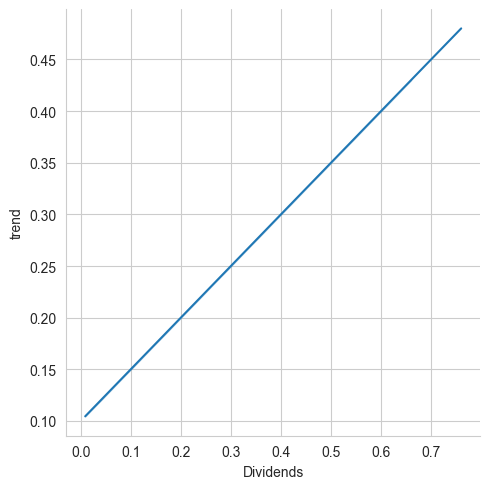

In [15]:
sns.relplot(data=df_mastercard_new, x = 'Dividends', y = 'trend', kind='line')
plt.show()

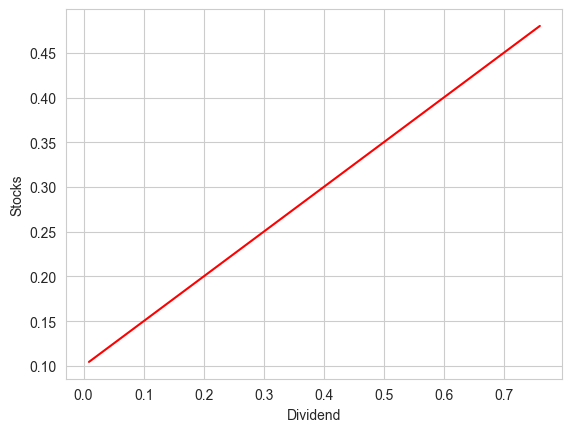

In [16]:
fig, ax = plt.subplots()

ax.plot(df_mastercard_new.Dividends, df_mastercard_new.trend, color = 'r')
ax.set_xlabel('Dividend')
ax.set_ylabel('Stocks')
plt.show()

In [24]:
my_sigma = 0.152

1 Sigma Rule :

In [25]:
df_mastercard_new['lwr_obs_68'] = df_mastercard_new.trend - my_sigma
df_mastercard_new['upr_obs_68'] = df_mastercard_new.trend + my_sigma
 

2 Sigma Rule:

In [26]:
df_mastercard_new['lwr_obs_95'] = df_mastercard_new.trend - 2 * my_sigma
df_mastercard_new['upr_obs_95'] = df_mastercard_new.trend + 2 * my_sigma

In [27]:
df_mastercard_new

,Dividends,trend,lwr_obs_68,upr_obs_68,lwr_obs_95,upr_obs_95
0,0.009,0.1045,-0.0475,0.2565,-0.1995,0.4085
1,0.009,0.1045,-0.0475,0.2565,-0.1995,0.4085
2,0.015,0.1075,-0.0445,0.2595,-0.1965,0.4115
3,0.015,0.1075,-0.0445,0.2595,-0.1965,0.4115
4,0.015,0.1075,-0.0445,0.2595,-0.1965,0.4115
...,...,...,...,...,...,...
69,0.660,0.4300,0.2780,0.5820,0.1260,0.7340
70,0.660,0.4300,0.2780,0.5820,0.1260,0.7340
71,0.660,0.4300,0.2780,0.5820,0.1260,0.7340
72,0.660,0.4300,0.2780,0.5820,0.1260,0.7340


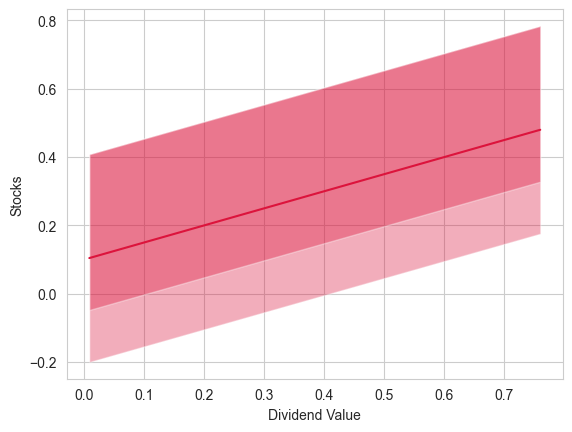

In [28]:
fig, ax = plt.subplots()

### True Trend 
ax.plot(df_mastercard_new.Dividends, df_mastercard_new.trend, color = 'crimson', linewidth = 1.5)

### Variation around the trend line using 2 sigma interval 
ax.fill_between(df_mastercard_new.Dividends, df_mastercard_new.lwr_obs_95, df_mastercard_new.upr_obs_95, facecolor = 'crimson', alpha = 0.35)


### Variation around the trend line using 1 sigma interval 
ax.fill_between(df_mastercard_new.Dividends, df_mastercard_new.lwr_obs_68, df_mastercard_new.upr_obs_95,facecolor = 'crimson', alpha = 0.35)

### Set Labels
ax.set_xlabel('Dividend Value')
ax.set_ylabel('Stocks')

### Show the Plot 
plt.show()